# WeatherPy
----

In [8]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import requests

In [2]:
import citipy_c as ct

Import a custom modification of citipy, stored in my project folders

## Generate Cities List

In order to generate cities, I will be creating a random latitude and longitude, and passing them into citipy's nearest_city funtion.

This method has a dramatic flaw - it will generate cities which massively favor the coastline. While that might be good for looking for a vacation location, it introduces some clear bias in how I analyze the relationship between weather and longitude.

In order to combat this, I have modified my local version of citipy to include a lat and lng in the class city.

In [3]:
#A brief lambda function to make my later conditional statements tidier
absCheck = lambda x, y: abs(abs(x) - abs(y))

In [9]:
#Create a list of dictionairies with data about found cities.
city_list=[]
while len(city_list) < 1200:
    row = {}
    #Generate a random latitude and longitude
    latitude = random.randint(-90,90)
    longitude = random.randint(-180, 180)
    city = ct.nearest_city(latitude, longitude)
    #This will test that the found city is within a 138 by 119 mile rectangle around the test point.
    if (absCheck(city.lat, latitude) <= 1) & (absCheck(city.lng, longitude) <= 1):
        row['name'] = city.city_name
        row['country code'] = city.country_code
        row['lat'] = round(city.lat, 3)
        row['lng'] = round(city.lng, 3)
        city_list.append(row)
#Turn my list of dictionaries into a dataframe.
city_df = pd.DataFrame(data=city_list).drop_duplicates()
print(len(city_df))
city_df.head()

1106


,name,country code,lat,lng
0,bad wurzach,de,47.900,9.900
1,ugoofaaru,mv,5.667,73.000
2,nalut,ly,31.868,10.983
3,oneonta,us,42.453,-75.064
4,illoqqortoormiut,gl,70.483,-21.967


And now a quick scatterplot of the generated cities latitude and longitude, to verify that distribution has worked as intended.

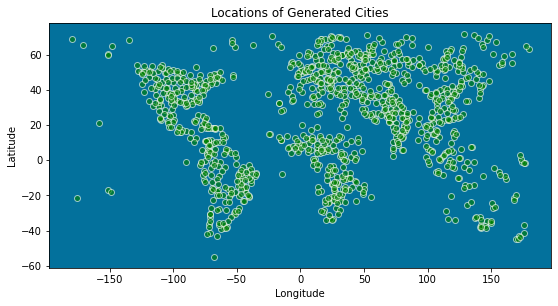

In [10]:
loc_fig, loc_ax = plt.subplots(figsize=(9,4.5))
loc_ax.set_title('Locations of Generated Cities')
loc_ax.set_xlabel('Longitude')
loc_ax.set_ylabel('Latitude')
loc_ax.set_facecolor('xkcd:ocean blue')
loc_ax.scatter( city_df['lng'], city_df['lat'],color='green', edgecolors='white', alpha=0.6)
plt.show()

As we can see, distribution is still not quite uniform - there's very few datapoints from areas that are largely uninhabitable, like the sahara desert and the himilayas. This data could be valuable, as all of these represent extreme climates which could challenge models we generate. However, we would likely need to completely rethink our approach to generating datapoints and forgo finding cities alltogether.

Instead, I will reframe the problem as understanding how latitude affects weather in human habitable environments. 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
from api_keys import weather_api_key

In [13]:
#Create a search URL for repeated Calls
city_ID = ''
country_code = ''
start = ''
end = ''
search_url = f'http://history.openweathermap.org/data/2.5/history/city?q={city_ID},{country_code}&type=hour&start={start}&end={end}&appid={weather_api_key}'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [4]:
#  Get the indices of cities that have humidity over 100%.


In [5]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression